<a href="https://colab.research.google.com/github/bitshoroscope/advent/blob/main/vwo_analysis_inline.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import auth
auth.authenticate_user()
print('Authenticated')

Authenticated


In [3]:
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure
from matplotlib.ticker import PercentFormatter
import pandas as pd
import seaborn as sns
import numpy as np
import pylab as pl

In [4]:
%load_ext google.colab.data_table

In [5]:
%%bigquery --project papyrus-data-mx df

SELECT p.id,vwo.score_quality, p.sale_price FROM `papyrus-data-mx.habi_mx_producto.vwo_results` vwo
join `papyrus-data-mx.habi_mx_okol.okol_properties` p
on p.id = vwo.id
where p.sale_price is not null and p.sale_price between 450000 and 10000000 
and not REGEXP_CONTAINS(p.description, "remate") and currency = 'MXN';

In [6]:
bin_size = 500000
sns.set_theme(style="whitegrid")

In [7]:
%%bigquery --project papyrus-data-mx df_properties
SELECT p.sale_price FROM `papyrus-data-mx.habi_mx_okol.okol_properties` p
where p.sale_price is not null and p.sale_price between 450000 and 10000000 
and p.purpose = 1 and created > '2022-04-20' and p.status = 1
and not REGEXP_CONTAINS(p.description, "remate") and currency = 'MXN';

Text(0.5, 1.0, 'Active properties')

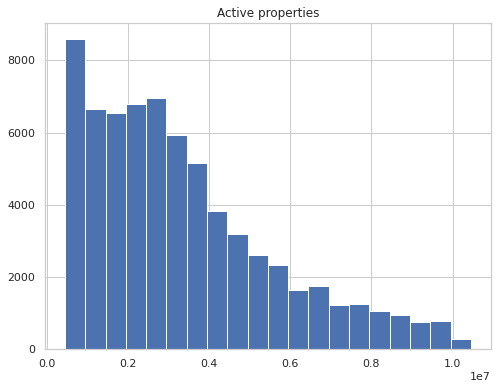

In [8]:
filtered = df_properties.loc[(df_properties['sale_price'] >= 450000) & (df_properties['sale_price'] <= 10000000)]
total = filtered['sale_price']
plt.figure(figsize=(8,6))
plt.hist(total, bins=np.arange(min(total), max(total) + bin_size, bin_size))
plt.title(f'Active properties')

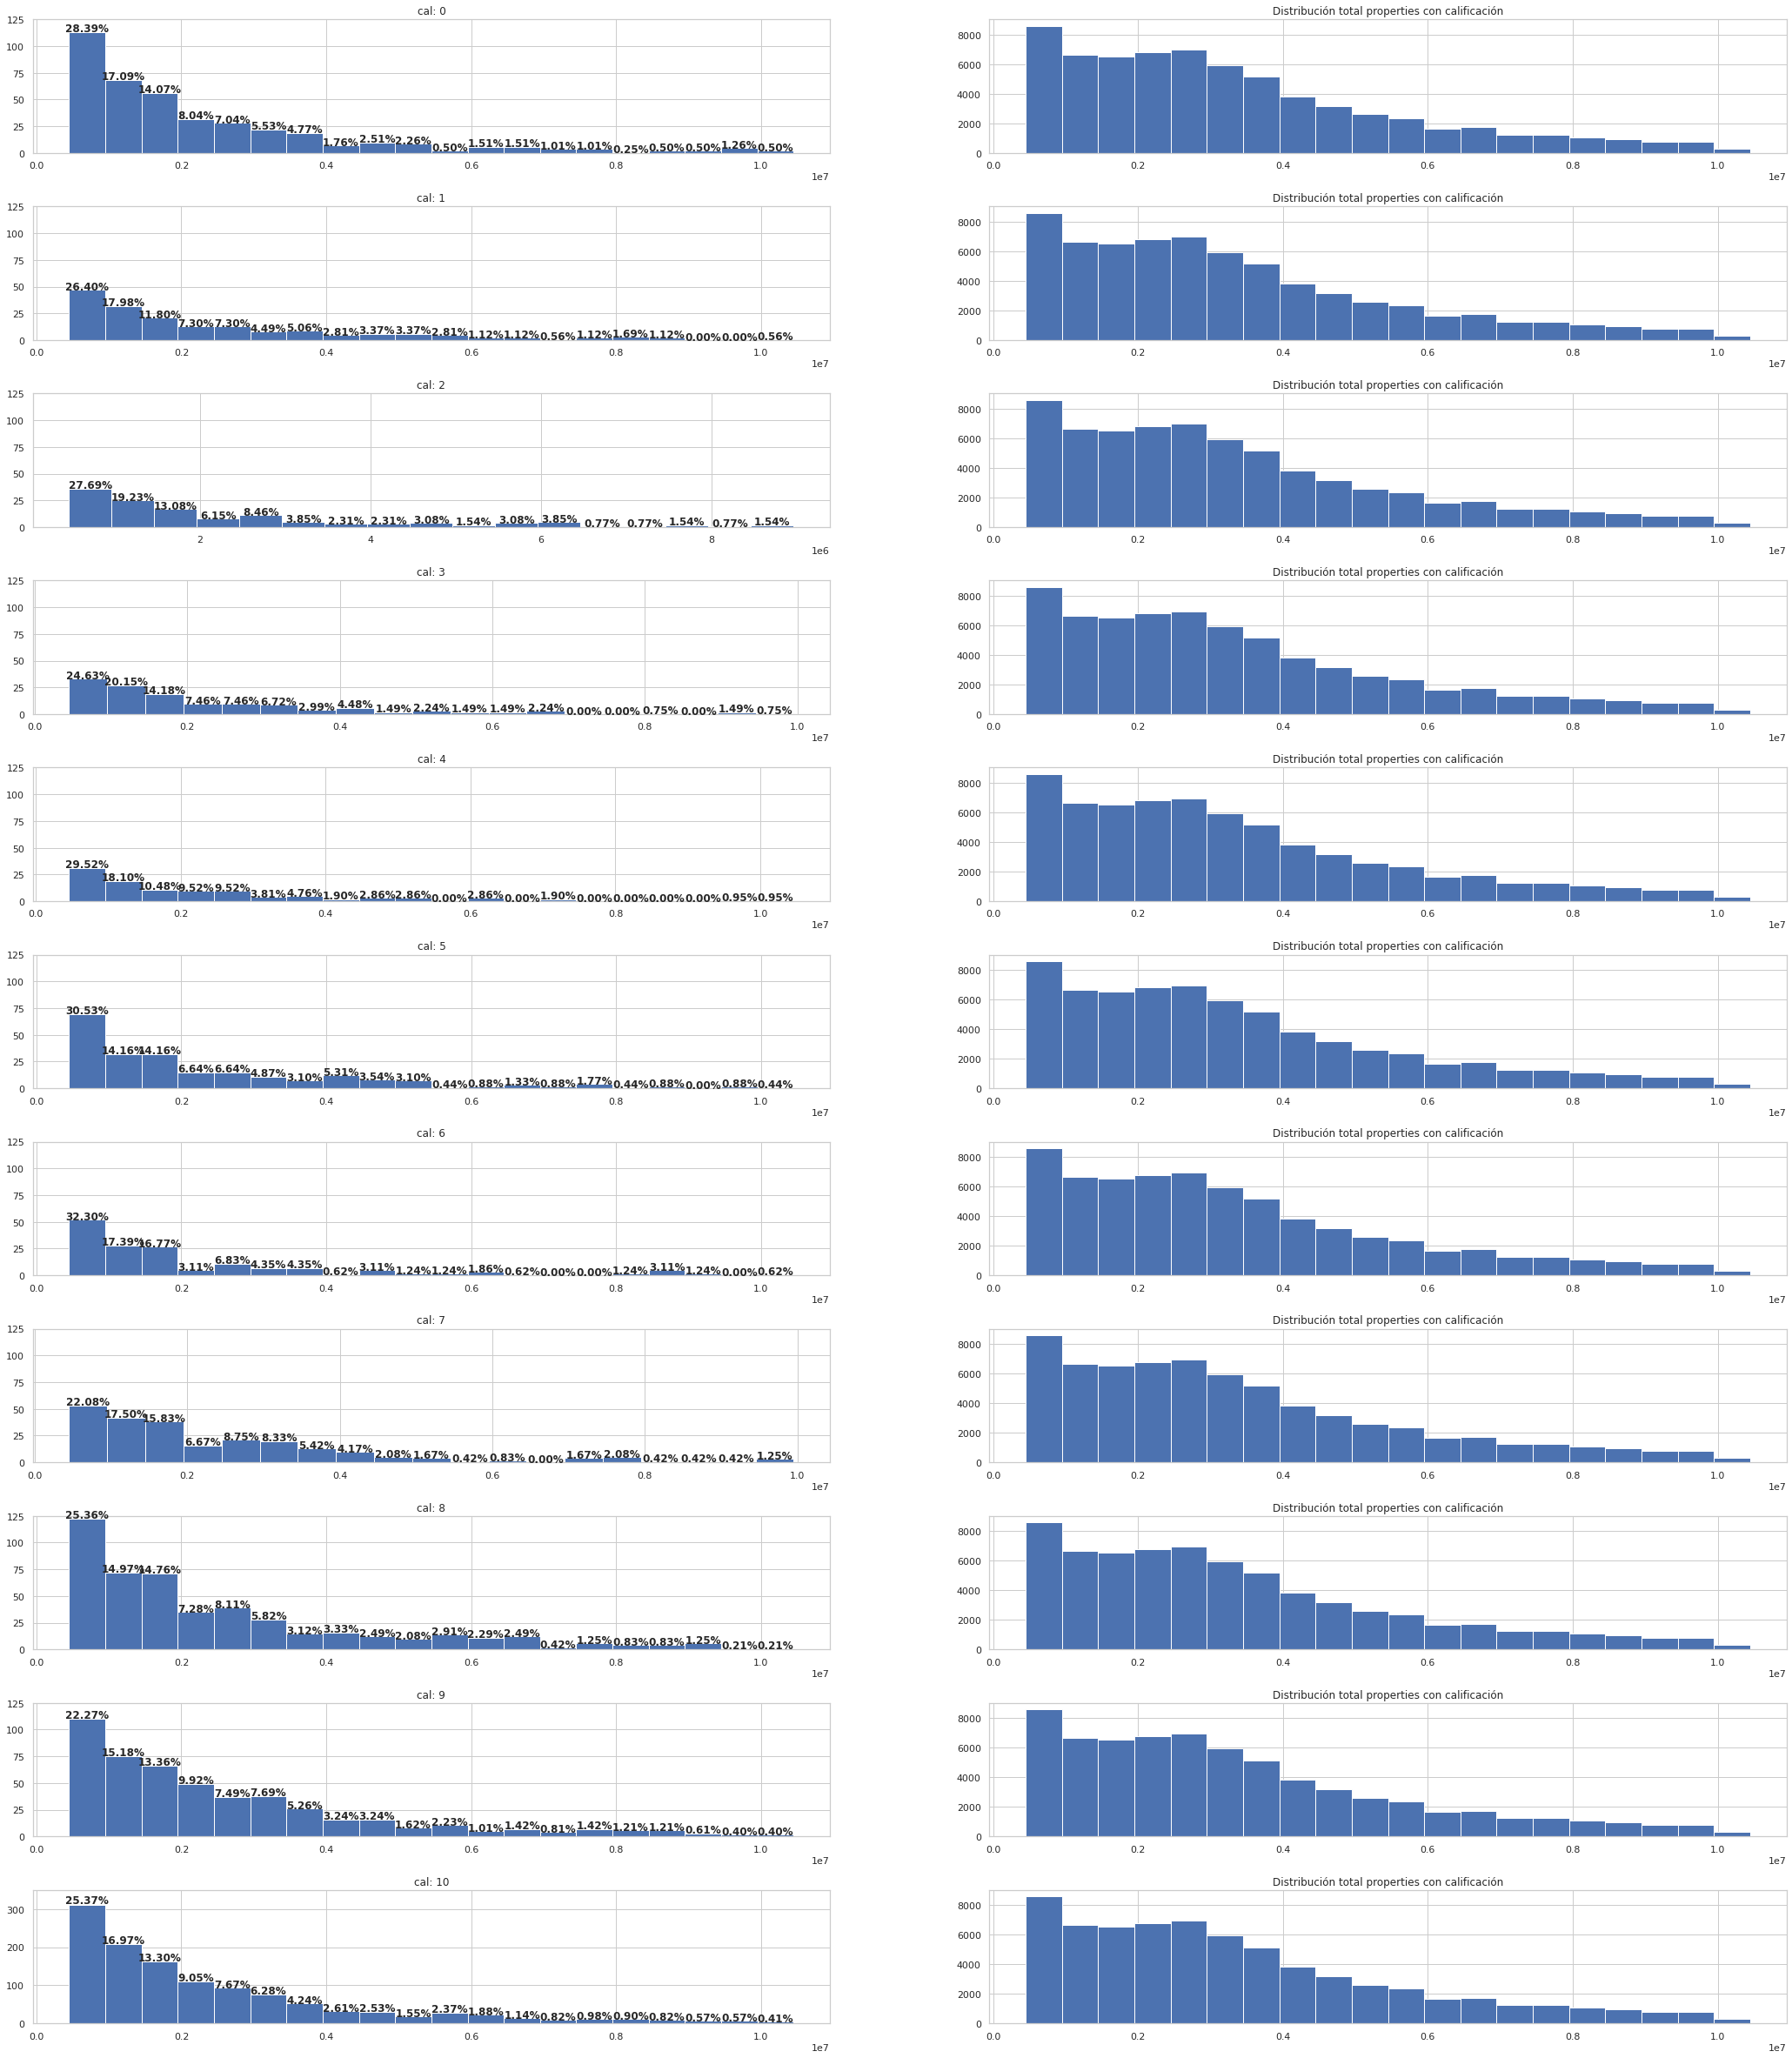

In [27]:
fig, axs = plt.subplots(11, 2, figsize=(35,40))
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.2, 
                    hspace=0.4)

for cal in range(11):
  filtered = df.loc[(df['score_quality'] == cal) & (df['sale_price'] >= 450000) & (df['sale_price'] <= 10000000)]
  ten = filtered['sale_price']
  axs[cal,0].set_ylim([0,125])
  if cal == 10:
    axs[cal,0].set_ylim([0,350])
  values, bins, bars = axs[cal, 0].hist(ten, bins=np.arange(min(ten), max(ten) + bin_size, bin_size), range=[6.5, 12.5])
  axs[cal, 0].title.set_text(f'cal: {cal}')
  i=0
  for p in bars:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
     
    axs[cal, 0].text(x+width/2,
             y+height*1.01,
             "{0:.2f}%".format(height/ten.size*100),
             #height,
             ha='center',
             weight='bold')
    i += 1
  axs[cal, 1].hist(total, bins=np.arange(min(total), max(total) + bin_size, bin_size))
  axs[cal, 1].title.set_text(f'Distribución total properties con calificación')


In [ ]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)

for cal in range(11):
  filtered = df.loc[(df['score_quality'] == cal) & (df['sale_price'] >= 450000) & (df['sale_price'] <= 10000000)]
  ten = filtered['sale_price']
  print(f'--- Cal: {cal}---')
  print(filtered['sale_price'].describe())

Text(0.5, 1.0, 'Distribución total con calificación')

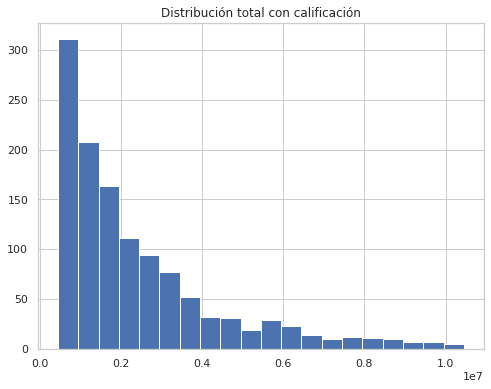

In [ ]:
# Distribución de precios de todos los inmuebles con calificación (sin outliers)
filtered = df.loc[(df['sale_price'] >= 450000) & (df['sale_price'] <= 10000000)]
active = filtered['sale_price']
plt.figure(figsize=(8,6))
plt.hist(ten, bins=np.arange(min(active), max(active) + bin_size, bin_size))
plt.title(f'Distribución total con calificación')

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


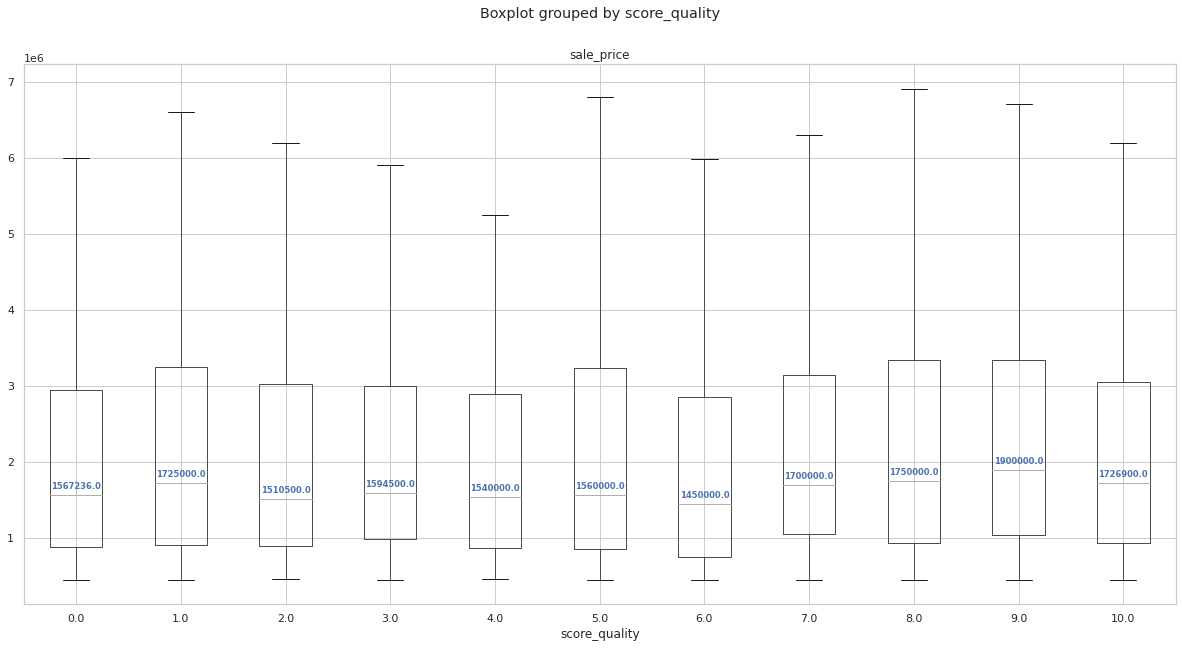

In [35]:
sns.set_style("whitegrid")
box_plot = df.boxplot(column=["sale_price"],by="score_quality", figsize=(20,10), showfliers=False)
medians = df.groupby(['score_quality'])['sale_price'].median()
vertical_offset = df['sale_price'].median() * 0.05 # offset from median for display

for xtick in box_plot.get_xticks():
    box_plot.text(xtick,medians[xtick-1] + vertical_offset,medians[xtick-1], 
            horizontalalignment='center',size='x-small',color='b',weight='semibold')